## Basic ML Solutions in PyTorch
# Image Classification
### CIFAR-10 

In [23]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar = torchvision.datasets.CIFAR10(root='.',train=True, download=True, transform=transforms.ToTensor())
cifar

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: .
    Split: Train
    StandardTransform
Transform: ToTensor()

In [18]:
cifar_test = torchvision.datasets.CIFAR10(root='.', train=False, download=True, transform=transforms.ToTensor())
cifar_test

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()

In [4]:
# feed in your training data to your neural network in batches
# DataLoader -> provides iterators over the dataset

train_loader = torch.utils.data.DataLoader(cifar, batch_size=8, shuffle=True, num_workers=2)
# how many subprocesses to use for data loading
train_loader

In [21]:
test_loader = torch.utils.data.DataLoader(cifar_test, batch_size=8, num_workers=2)
test_loader

In [6]:
labels = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
image_batch, label_batch = iter(train_loader).next()

In [8]:
# number of images/batch size = 8
# number of channels = 3
# each image is of 32*32 in size
image_batch.shape

torch.Size([8, 3, 32, 32])

In [9]:
# viz a batch of data
# make_grid -> place images side by side
img_viz = torchvision.utils.make_grid(image_batch)

# channel numbers, height, weight
img_viz.shape

torch.Size([3, 36, 274])

In [10]:
# in order to viz this, apply transpose to make # channel the last element
np.transpose(img_viz, (1,2,0)).shape

torch.Size([36, 274, 3])

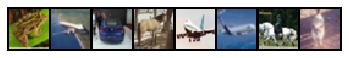

In [11]:
plt.imshow(np.transpose(img_viz, (1,2,0)))
plt.axis('off')
plt.show()

In [12]:
inp_size = 3 # for each color channel
hid1_size = 16 # number of channel outputs by 1st Convolutional Layer
hid2_size = 32 # number of channel outputs by 2nd Convolutional Layer
out_size = len(labels)
k_conv_size= 5 # Convolutional Kernel size -> 5*5 sliding window

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(inp_size, hid1_size, k_conv_size),
            nn.BatchNorm2d(hid1_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # pooling kernel of size 2*2
        )
            
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size),
            nn.BatchNorm2d(hid2_size),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(hid2_size * k_conv_size * k_conv_size, out_size) # 32*5*5 
    
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        # reshape the output so each image is represented as 1D vector to feed the linear layer
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [14]:
model = CNN()
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=800, out_features=10, bias=True)
)

In [15]:
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [16]:
total_steps = len(train_loader)
epochs = 25

for epoch in range(epochs):
    for index, (image,label) in enumerate(train_loader):
        
        output = model(image)
        loss = criterion(output, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(epoch%5==0 and index%2000==0):
            print('Epoch [{}/{}], Step [{}/{}], Loss {:.4f}'.format(
            epoch+1, epochs, index+1, total_steps, loss.item()))    

Epoch [1/25], Step [1/6250], Loss 2.5846
Epoch [1/25], Step [2001/6250], Loss 1.6750
Epoch [1/25], Step [4001/6250], Loss 1.6317
Epoch [1/25], Step [6001/6250], Loss 1.1658
Epoch [6/25], Step [1/6250], Loss 0.3843
Epoch [6/25], Step [2001/6250], Loss 1.0636
Epoch [6/25], Step [4001/6250], Loss 0.9478
Epoch [6/25], Step [6001/6250], Loss 0.3153
Epoch [11/25], Step [1/6250], Loss 0.6713
Epoch [11/25], Step [2001/6250], Loss 1.1653
Epoch [11/25], Step [4001/6250], Loss 0.5347
Epoch [11/25], Step [6001/6250], Loss 0.6533
Epoch [16/25], Step [1/6250], Loss 0.6511
Epoch [16/25], Step [2001/6250], Loss 1.2092
Epoch [16/25], Step [4001/6250], Loss 0.6298
Epoch [16/25], Step [6001/6250], Loss 1.3920
Epoch [21/25], Step [1/6250], Loss 0.6846
Epoch [21/25], Step [2001/6250], Loss 0.3073
Epoch [21/25], Step [4001/6250], Loss 0.5275
Epoch [21/25], Step [6001/6250], Loss 0.7286


In [22]:
model.eval()
with torch.no_grad():
    correct_pred = 0
    total = 0
    
    for index, (images, labels) in enumerate(test_loader):
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct_pred+= (predicted == labels).sum().item()
        
    print('Accuracy of the CNN model: ', (correct_pred/total * 100))

Accuracy of the CNN model:  71.03
